# Estabilidad de la simulación, métricas y gráficas


En este notebook se quiere tocar 3 temas:

- La variabilidad de una simulación "healthy" en Brian2.
- Ver qué métricas se pueden usar para evaluar los daños neuronales.
- Qué gráficas realizar para visualizar las métricas.


In [2]:
# Importamos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from LennartToellke_files.plotting_Toellke import *
from LennartToellke_files.Event_detection_Toellke import *
from pathlib import Path
import os
from brian2 import *
from plotting_JuanLuis import *

# Calculamos la ruta a la carpeta del notebook
notebook_folder = Path(os.getcwd())

## Comprobar la variabilidad de las simulaciones de Brian2


Nos guardamos todos los resultados de las simulaciones para poder analizarlos posteriormente.


In [3]:
# Localizamos la ruta de los resultados
results_folder = notebook_folder.parent / "results" / "healthy_validation"

# Cremaos una lista para almacenar los resultados
lfp_data = []

# Hacemos un bucle para recorrer todas las carpetas dentr de results_folder
# y leer los archivos LFP.txt que hay dentro de las carpetas
for folder in results_folder.iterdir():
    if folder.is_dir():
        # Leer los resultados del archivo LFP.txt
        lfp = create_list_from_timeSeries(folder / "LFP.txt")
        lfp_data.append(np.array(lfp))

print(f"Se han encontrado {len(lfp_data)} archivos LFP.txt")

Se han encontrado 10 archivos LFP.txt


Dividimos en tres tipos principales de datos (`eventos`, `ripples`, `psd`).


In [4]:
# Sacamos los datos de cada archivo LFP.txt
event_data = []
ripple_data = []
psd_bands = []
for lfp in lfp_data:
    events, ripple, psd_band = event_detection(lfp)
    event_data.append(events)
    ripple_data.append(ripple)
    psd_bands.append(psd_band)

Vamos a analizar la variación en las bandas de densidad de potencia.


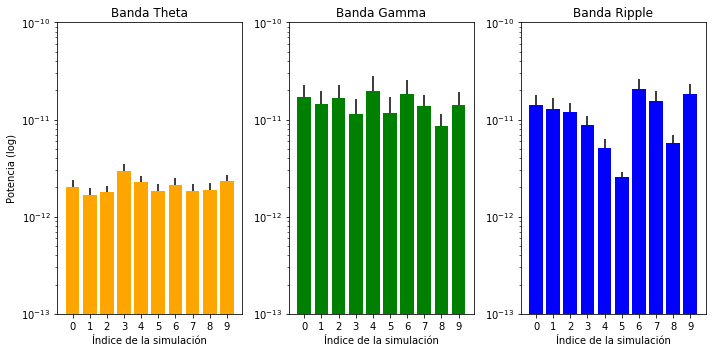

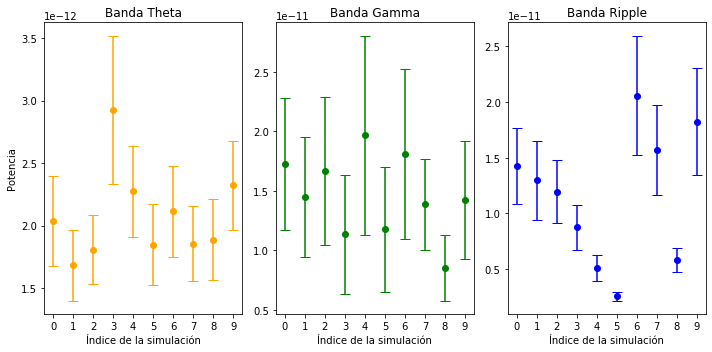

In [5]:
# Comprobamos los resultados de psd_bands
theta_bands = {
    "mean": [],
    "std": []
}
gamma_bands = {
    "mean": [],
    "std": []
}
ripple_bands = {
    "mean": [],
    "std": []
}
for psd_band in psd_bands:
    # print([np.mean(x) for x in psd_band])
    # print(len(psd_band))

    # Medias
    theta_band, gamma_band, ripple_band = [np.mean(x) for x in psd_band]
    theta_bands["mean"].append(theta_band)
    gamma_bands["mean"].append(gamma_band)
    ripple_bands["mean"].append(ripple_band)
    # Desviaciones estándar
    theta_band_std, gamma_band_std, ripple_band_std = [
        np.std(x) for x in psd_band]
    theta_bands["std"].append(theta_band_std / np.sqrt(len(psd_band[0])))
    gamma_bands["std"].append(gamma_band_std / np.sqrt(len(psd_band[0])))
    ripple_bands["std"].append(ripple_band_std / np.sqrt(len(psd_band[0])))

# Representamos los resultados de las bandas de frecuencia
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
# Banda Theta
axs[0].set_yscale('log')
axs[0].bar(
    np.arange(len(theta_bands["mean"])),
    theta_bands["mean"],
    yerr=theta_bands["std"],
    error_kw={'zorder': 2}, zorder=3,
    color="orange"
)
axs[0].set_ylim(1e-13, 1e-10)
axs[0].set_xticks(np.arange(len(theta_bands["mean"])))
axs[0].set_title("Banda Theta")
axs[0].set_ylabel("Potencia (log)")
axs[0].set_xlabel("Índice de la simulación")
# Banda Gamma
axs[1].set_yscale('log')
axs[1].bar(
    np.arange(len(gamma_bands["mean"])),
    gamma_bands["mean"],
    yerr=gamma_bands["std"],
    error_kw={'zorder': 2}, zorder=3,
    color="green"
)
axs[1].set_ylim(1e-13, 1e-10)
axs[1].set_xticks(np.arange(len(gamma_bands["mean"])))
axs[1].set_title("Banda Gamma")
axs[1].set_xlabel("Índice de la simulación")
# Banda Ripple
axs[2].set_yscale('log')
axs[2].bar(
    np.arange(len(ripple_bands["mean"])),
    ripple_bands["mean"],
    yerr=ripple_bands["std"],
    error_kw={'zorder': 2}, zorder=3,
    color="blue"
)
axs[2].set_ylim(1e-13, 1e-10)
axs[2].set_xticks(np.arange(len(ripple_bands["mean"])))
axs[2].set_xlabel("Índice de la simulación")
axs[2].set_title("Banda Ripple")
fig.tight_layout()
plt.show()


# Volvemos a realizar el gráfico pero con un gráfico de puntos y no te barras
fig2, axs2 = plt.subplots(1, 3, figsize=(10, 5))
# Banda Theta
x_theta = np.arange(len(theta_bands["mean"]))
axs2[0].errorbar(
    x_theta,
    theta_bands["mean"],
    yerr=theta_bands["std"],
    fmt='o',
    capsize=5,
    color="orange",
    zorder=3
)
axs2[0].set_xticks(x_theta)
axs2[0].set_title("Banda Theta")
axs2[0].set_ylabel("Potencia")
axs2[0].set_xlabel("Índice de la simulación")
# Banda Gamma
x_gamma = np.arange(len(gamma_bands["mean"]))
axs2[1].errorbar(
    x_gamma,
    gamma_bands["mean"],
    yerr=gamma_bands["std"],
    fmt='o',
    capsize=5,
    color="green",
    zorder=3
)
axs2[1].set_xticks(x_gamma)
axs2[1].set_title("Banda Gamma")
axs2[1].set_xlabel("Índice de la simulación")
# Banda Ripple
x_ripple = np.arange(len(ripple_bands["mean"]))
axs2[2].errorbar(
    x_ripple,
    ripple_bands["mean"],
    yerr=ripple_bands["std"],
    fmt='o',
    capsize=5,
    color="blue",
    zorder=3
)
axs2[2].set_xticks(x_ripple)
axs2[2].set_title("Banda Ripple")
axs2[2].set_xlabel("Índice de la simulación")
fig2.tight_layout()
plt.show()

Ahora analizaremos la variación en las frecuencias pico.


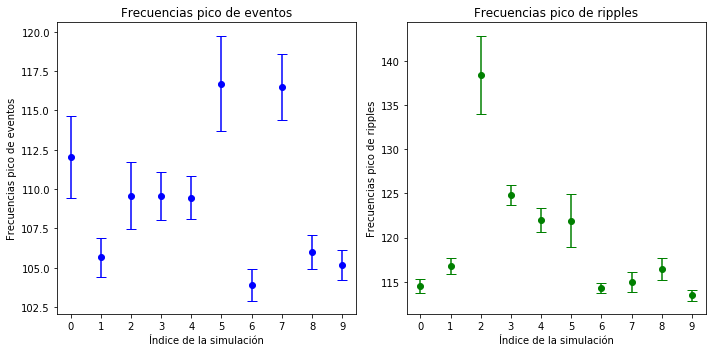

In [6]:
events_pf = {
    "mean": [],
    "std": []
}
ripple_pf = {
    "mean": [],
    "std": []
}
for events, ripples in zip(event_data, ripple_data):
    # Eventos
    events_pf["mean"].append(np.mean(events[2]))
    events_pf["std"].append(np.std(events[2]) / len(events[2]))
    # Ripples
    ripple_pf["mean"].append(np.mean(ripples[1]))
    ripple_pf["std"].append(np.std(ripples[1]) / len(ripples[1]))

# Representamos los resultados de las frecuencias pico
fig3, axs3 = plt.subplots(1, 2, figsize=(10, 5))
# Frecuencias pico de eventos
axs3[0].errorbar(
    np.arange(len(events_pf["mean"])),
    events_pf["mean"],
    yerr=events_pf["std"],
    fmt='o',
    capsize=5,
    color="blue",
    zorder=3
)
axs3[0].set_ylabel("Frecuencias pico de eventos")
axs3[0].set_xlabel("Índice de la simulación")
axs3[0].set_xticks(np.arange(len(events_pf["mean"])))
axs3[0].set_title("Frecuencias pico de eventos")
# Frecuencias pico de ripples
axs3[1].errorbar(
    np.arange(len(ripple_pf["mean"])),
    ripple_pf["mean"],
    yerr=ripple_pf["std"],
    fmt='o',
    capsize=5,
    color="green",
    zorder=3
)
axs3[1].set_ylabel("Frecuencias pico de ripples")
axs3[1].set_xlabel("Índice de la simulación")
axs3[1].set_xticks(np.arange(len(ripple_pf["mean"])))
axs3[1].set_title("Frecuencias pico de ripples")
fig3.tight_layout()
plt.show()

Ahora vamos a analizar la variación del tiempo de duración de los ripples.


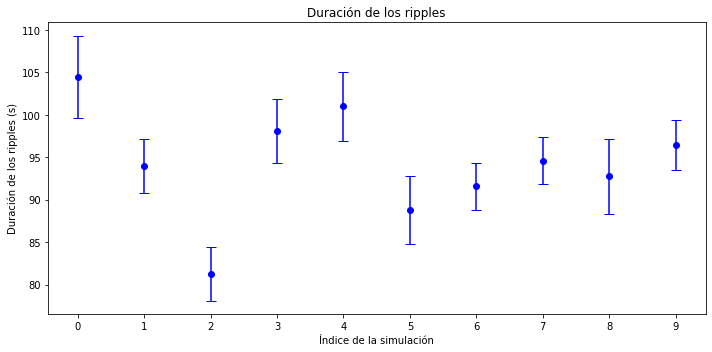

In [7]:
duration_ripples = {
    "mean": [],
    "std": []
}

for ripples in ripple_data:
    # Duración de los ripples
    duration_ripples["mean"].append(np.mean(ripples[2]))
    duration_ripples["std"].append(np.std(ripples[2]) / len(ripples[2]))

# Representamos los resultados de la duración de los ripples
fig4, ax4 = plt.subplots(figsize=(10, 5))
ax4.errorbar(
    np.arange(len(duration_ripples["mean"])),
    duration_ripples["mean"],
    yerr=duration_ripples["std"],
    fmt='o',
    capsize=5,
    color="blue",
    zorder=3
)
ax4.set_ylabel("Duración de los ripples (s)")
ax4.set_xlabel("Índice de la simulación")
ax4.set_xticks(np.arange(len(duration_ripples["mean"])))
ax4.set_title("Duración de los ripples")
fig4.tight_layout()
plt.show()

## Métricas


Ahora vamos a ver qué métricas podemos usar para evlaluar los daños neuronales. Hay que tener en cuenta que debido a la "inestabilidad" de las simulaciones, necesitamos realizar varias a la vez, por lo que habrá que pensar también si es necesario representar algo más que una media y un error estándar de esta media.


La función `event_detection` del trabajo de Toellke nos proporciona los siguinetes datos a partir de un archivo `LFP.txt`:

- **Datos relacionados con eventos:**
  - Lista de eventos.
  - Lista de eventos filtrados.
  - Lista de frecuencias pico de cada evento.
  - Lista de las duraciones de cada evento.
- **Datos relacionados con SWRs:**
  - Lista de SWRs.
  - Lista de frecuencias pico de cada SWR.
  - Lista de duraciones de cada SWR.
- **Datos relacionados con la densidad espectral de potencia (PSD):**
  - Lista de densidad espectrla de potencia (PSD) en el rango de frecuencias "theta" (5-10 Hz).
  - Lista de densidad espectral de potencia (PSD) en el rango de frecuencias "gamma" (30-100 Hz).
  - Lista de densidad espectral de potencia (PSD) en el rango de frecuencias "ripples" (100-250 Hz).


A partir de estos datos, podemos probar a calcular las siguientes métricas:

- **Cantidades:**
  - Número de eventos.
  - Número de SWRs.
- **Duraciones:**
  - Duraciones de eventos.
  - Duraciones de SWRs.
- **Frecuencias:**
  - Frecuencias pico de eventos.
  - Frecuencias pico de SWRs.
- **Potencias:**
  - Potencia en el rango de frecuencias "theta".
  - Potencia en el rango de frecuencias "gamma".
  - Potencia en el rango de frecuencias "ripples".


In [8]:
path1 = str(results_folder)
path2 = str(results_folder.parent / "noise_attacks_1")
path3 = str(results_folder.parent / "own_results_1")

data_dict_1 = data_to_dict(path1)
data_dict_2 = data_to_dict(path2)
data_dict_3 = data_to_dict(path3)
dicts = [data_dict_1, data_dict_2, data_dict_3]

labels = [
    "Healthy validation",
    "Noise attacks",
    "Own results"
]

### Cantidad de eventos y SWRs


WARNING    /home/juan-luis/git-repositories/TFM-BigData/simulation-eeg/plotting_JuanLuis.py:115: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
 [py.warnings]


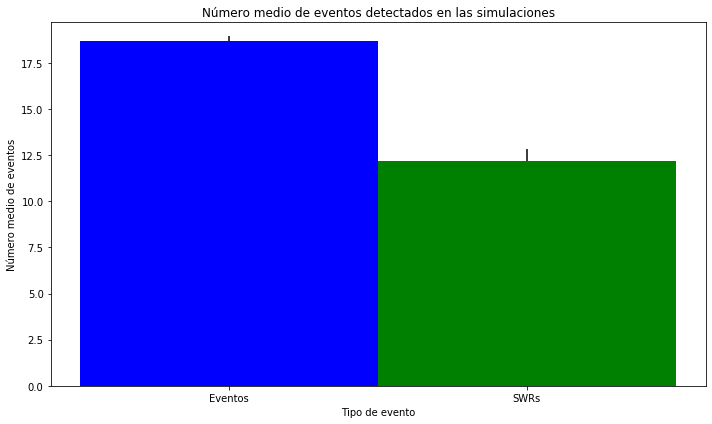

In [9]:
n_detects_single(
    data_dict=data_dict_1,
    figsize=(10, 6)
)

WARNING    /home/juan-luis/git-repositories/TFM-BigData/simulation-eeg/plotting_JuanLuis.py:229: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
 [py.warnings]


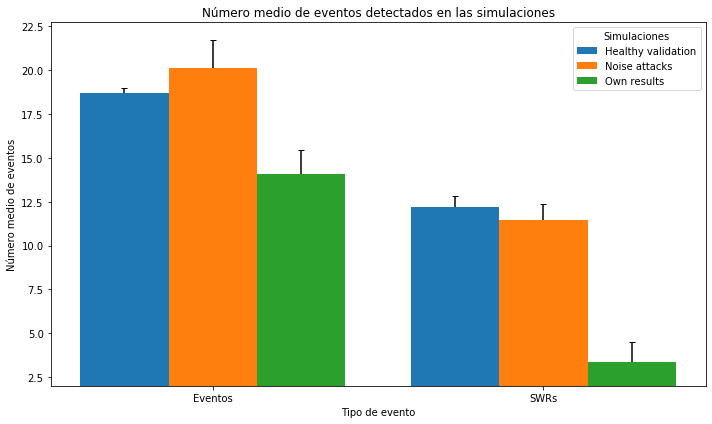

In [10]:
n_detects_multiple(
    data_dict=dicts,
    labels=labels,
    figsize=(10, 6)
)

### Duración de eventos y SWRs


WARNING    /home/juan-luis/git-repositories/TFM-BigData/simulation-eeg/plotting_JuanLuis.py:285: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
 [py.warnings]


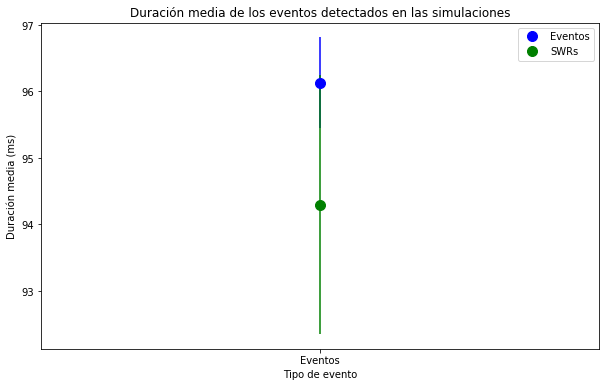

In [11]:
duration_single(
    data_dict=data_dict_1,
    figsize=(10, 6)
)

WARNING    /home/juan-luis/git-repositories/TFM-BigData/simulation-eeg/plotting_JuanLuis.py:404: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
 [py.warnings]


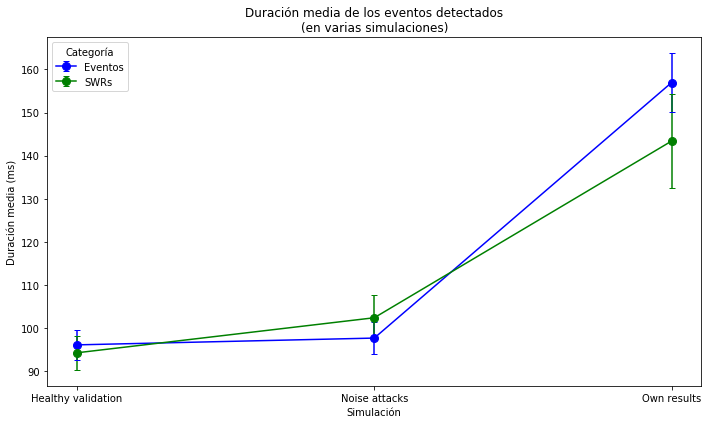

In [12]:
duration_multiple(
    data_dict=dicts,
    labels=labels,
    figsize=(10, 6)
)

### Frecuencias pico de eventos y SWRs


WARNING    /home/juan-luis/git-repositories/TFM-BigData/simulation-eeg/plotting_JuanLuis.py:459: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
 [py.warnings]


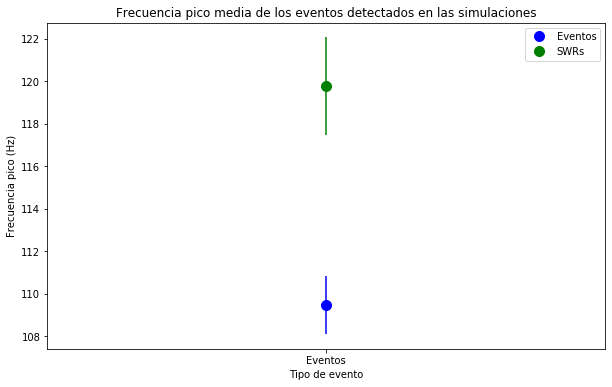

In [13]:
peak_freqs_single(
    data_dict=data_dict_1,
    figsize=(10, 6)
)

WARNING    /home/juan-luis/git-repositories/TFM-BigData/simulation-eeg/plotting_JuanLuis.py:596: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
 [py.warnings]


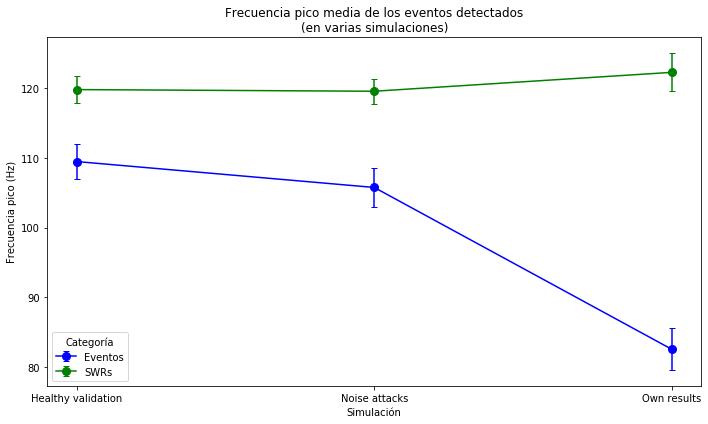

In [14]:
peak_freqs_multiple(
    data_dict=dicts,
    labels=labels,
    figsize=(10, 6)
)

### PSD


WARNING    /home/juan-luis/git-repositories/TFM-BigData/simulation-eeg/plotting_JuanLuis.py:651: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
 [py.warnings]


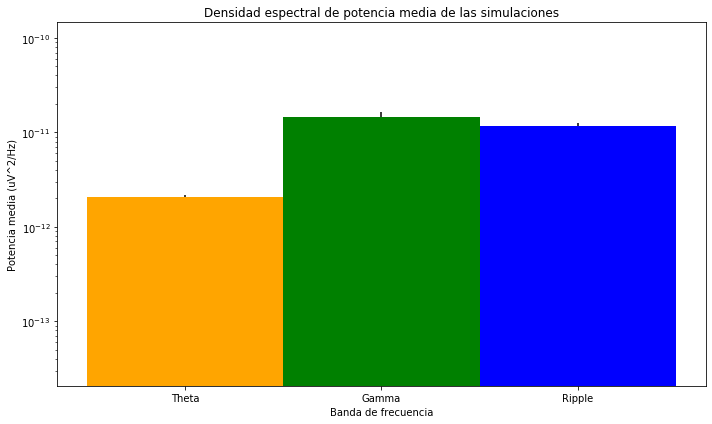

In [15]:
psd_plots_single(
    data_dict=data_dict_1,
    figsize=(10, 6)
)

WARNING    /home/juan-luis/git-repositories/TFM-BigData/simulation-eeg/plotting_JuanLuis.py:763: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
 [py.warnings]


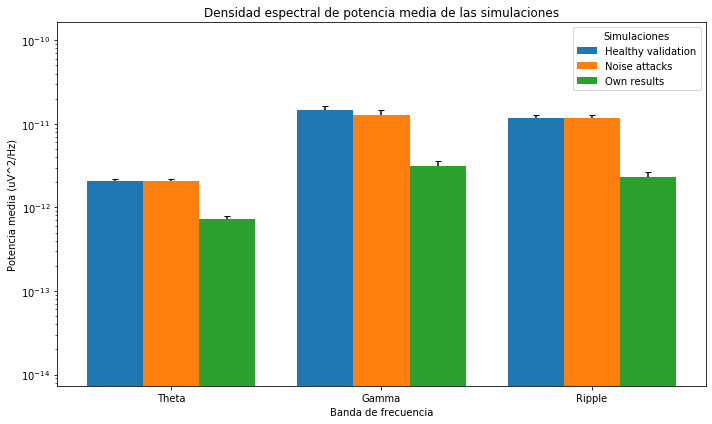

In [16]:
# Repetimos el mismo diccionario para simular múltiples carpetas
psd_plots_multiple(
    data_dict=dicts,
    labels=labels,
    figsize=(10, 6)
)